# Regresión lineal para predecir alto riesgo en embarazo usando un DB de Kaggle

In [1]:
##importar librerias
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
##Subir data set 
dataset = pd.read_csv("Maternal Health Risk Data Set.csv")

## Caraterísticas del data set:
-Age: Edad en años de la embarazada
SystolicBP: Presión sistólica en mmHg (Característica importante que cuando se eleva se asocia a embarazo de alto riesgo).
DiastolicBP: Presión diastólica in mmHg (aracterística importante que cuando se eleva se asocia a embarazo de alto riesgo).
BS: Niveles de glucosa sérica en  mmol/L.
HeartRate: Ritmo cardiaco en resposo en latidos por minuto in beats per minute.
Risk Level: Nivel de riesgo durante el embarazo considerando las variables mencionadas arriba.

## Análisis

### Evaluación caracteristcas del dataset

In [3]:
dataset.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
dataset.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [5]:
dataset.shape

(1014, 7)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [7]:
dataset.dtypes


Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [8]:
dataset.tail()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk
1013,32,120,65,6.0,101.0,76,mid risk


### Evaluación y eliminación de valores nulos

In [9]:

dataset.isnull().mean()


Age            0.0
SystolicBP     0.0
DiastolicBP    0.0
BS             0.0
BodyTemp       0.0
HeartRate      0.0
RiskLevel      0.0
dtype: float64

### Evaluación y eliminación de valores duplicados

In [10]:
data_dup = dataset.duplicated().any()
data_dup

True

In [11]:
dataset = dataset.drop_duplicates()

In [12]:
data_dup = dataset.duplicated().any()
data_dup

False

### Separación y exploración de variables continuas y categoricas

In [14]:
##Separar variables continuas de variables categoricas
ca_val=[]
co_val=[]

for column in dataset.columns:
    if dataset[column].nunique() <=10:
        ca_val.append(column)
    else:
        co_val.append(column)

In [15]:
#Categorical Data
ca_val

['BodyTemp', 'RiskLevel']

In [16]:
dataset['BodyTemp'].unique()

array([ 98. , 100. , 102. , 101. , 103. ,  98.4,  99. ,  98.6])

In [18]:
dataset['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [19]:
co_val

['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'HeartRate']

In [20]:
dataset ['Age'].unique()

array([25, 35, 29, 30, 23, 32, 42, 19, 20, 48, 15, 50, 10, 40, 21, 18, 16,
       22, 49, 28, 12, 60, 55, 45, 31, 17, 26, 54, 44, 33, 13, 34, 38, 39,
       63, 14, 37, 51, 62, 43, 65, 66, 56, 70, 27, 36, 59, 24, 41, 46])

In [21]:
dataset['SystolicBP'].unique()

array([130, 140,  90, 120,  85, 110,  70, 100,  75,  95,  76,  80, 115,
       135, 160, 129,  83,  99,  78])

In [22]:
dataset['DiastolicBP'].unique()

array([ 80,  90,  70,  85,  60,  89,  75, 100,  50,  65,  95,  49,  63,
        69,  76,  68])

In [23]:
dataset['BS'].unique()

array([15.  , 13.  ,  8.  ,  7.  ,  6.1 ,  7.01, 11.  ,  6.9 , 18.  ,
        6.7 ,  7.5 ,  7.2 ,  7.1 ,  6.4 ,  9.  ,  6.  ,  7.7 , 12.  ,
       16.  ,  7.8 ,  6.8 ,  7.9 , 17.  , 19.  , 10.  ,  6.3 ,  6.6 ,
        6.5 ,  7.6 ])

In [24]:
dataset['HeartRate'].unique()

array([86, 70, 80, 76, 78, 77, 88, 90, 66, 82, 60, 75, 67, 65, 68,  7])

In [25]:
##Sustituir valores de Risk level por datos ordinales
RiskLevel = {'low risk':1, 
        'mid risk':2, 
        'high risk':3}

# aplicar usando map
dataset['RiskLevel'] = dataset['RiskLevel'].map(RiskLevel).astype(float)
dataset

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,2.0
674,15,100,60,6.0,98.0,80,1.0
703,15,100,49,7.6,98.0,77,1.0
704,12,100,50,6.0,98.0,70,2.0


In [26]:
dataset ['RiskLevel'].value_counts()

1.0    234
3.0    112
2.0    106
Name: RiskLevel, dtype: int64

In [27]:
dataset

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,2.0
674,15,100,60,6.0,98.0,80,1.0
703,15,100,49,7.6,98.0,77,1.0
704,12,100,50,6.0,98.0,70,2.0


In [28]:
dataset.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,29.194690,110.553097,75.418142,8.346173,98.692478,73.949115,1.730088
std,13.767379,17.872282,13.754578,2.829209,1.410897,8.156973,0.833169
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,1.000000
25%,19.000000,90.000000,65.000000,6.900000,98.000000,70.000000,1.000000
50%,25.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,35.000000,120.000000,86.000000,7.900000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,3.000000


<AxesSubplot:xlabel='RiskLevel', ylabel='count'>

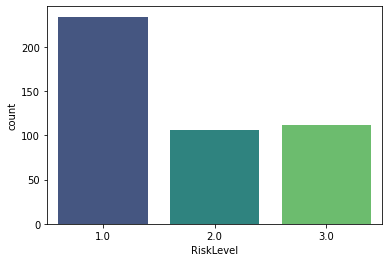

In [31]:
dataset['RiskLevel'].value_counts()

dataset['RiskLevel'].value_counts() * 100 / len(dataset)


sns.countplot(x='RiskLevel', data=dataset, palette='viridis')

### Análisis de correlación

In [32]:
dataset.corr()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.375931,0.347846,0.376616,-0.188843,0.077407,0.183010
SystolicBP,0.375931,1.000000,0.790002,0.347534,-0.207267,-0.006088,0.327365
DiastolicBP,0.347846,0.790002,1.000000,0.300423,-0.201992,-0.016470,0.254239
BS,0.376616,0.347534,0.300423,1.000000,-0.042511,0.135605,0.548888
BodyTemp,-0.188843,-0.207267,-0.201992,-0.042511,1.000000,0.087262,0.259701
HeartRate,0.077407,-0.006088,-0.016470,0.135605,0.087262,1.000000,0.183289
RiskLevel,0.183010,0.327365,0.254239,0.548888,0.259701,0.183289,1.000000


In [33]:
from matplotlib import pyplot as plt

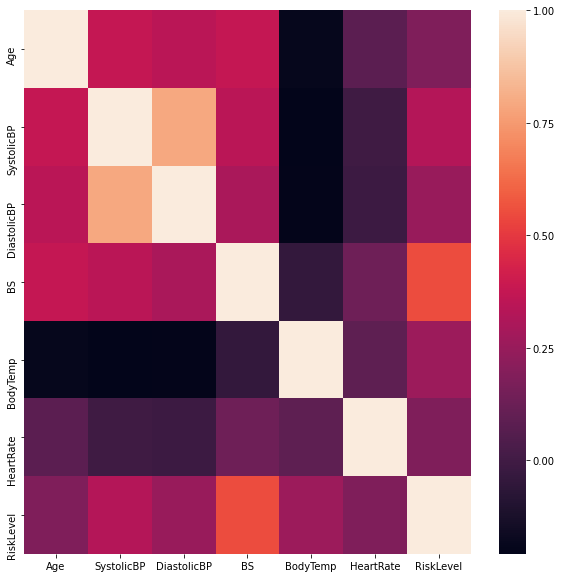

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr());

#### Evaluación de distribución de las variables

(array([61., 97., 94., 60., 37., 33., 26., 20., 19.,  5.]),
 array([10., 16., 22., 28., 34., 40., 46., 52., 58., 64., 70.]),
 <BarContainer object of 10 artists>)

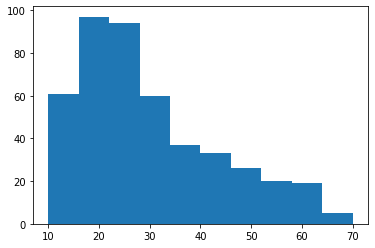

In [48]:
plt.hist(dataset["Age"])

(array([ 16.,  23.,  87.,  58.,  10., 191.,  22.,  44.,   0.,   1.]),
 array([ 70.,  79.,  88.,  97., 106., 115., 124., 133., 142., 151., 160.]),
 <BarContainer object of 10 artists>)

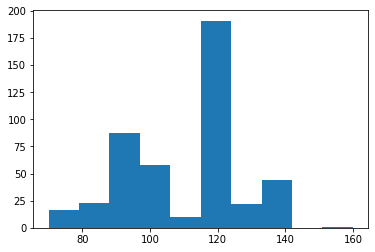

In [49]:
plt.hist(dataset["SystolicBP"])

(array([27.,  0., 81., 46., 46., 21., 94., 25., 70., 42.]),
 array([ 49. ,  54.1,  59.2,  64.3,  69.4,  74.5,  79.6,  84.7,  89.8,
         94.9, 100. ]),
 <BarContainer object of 10 artists>)

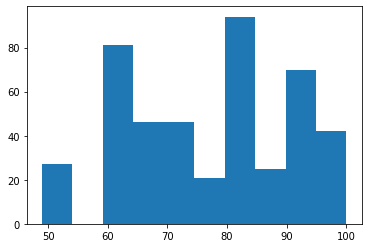

In [50]:
plt.hist(dataset["DiastolicBP"])

(array([201., 168.,  12.,  16.,   9.,   5.,  20.,   6.,   1.,  14.]),
 array([ 6. ,  7.3,  8.6,  9.9, 11.2, 12.5, 13.8, 15.1, 16.4, 17.7, 19. ]),
 <BarContainer object of 10 artists>)

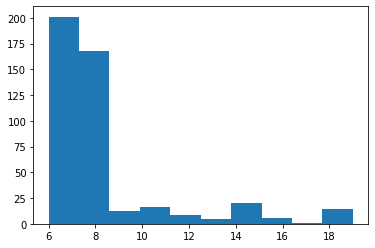

In [51]:
plt.hist(dataset["BS"])

(array([355.,   1.,   8.,   0.,   8.,   0.,  41.,   0.,  30.,   9.]),
 array([ 98. ,  98.5,  99. ,  99.5, 100. , 100.5, 101. , 101.5, 102. ,
        102.5, 103. ]),
 <BarContainer object of 10 artists>)

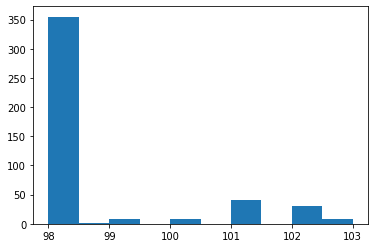

In [52]:
plt.hist(dataset["BodyTemp"])

(array([  1.,   0.,   0.,   0.,   0.,   0.,  40., 166., 183.,  62.]),
 array([ 7. , 15.3, 23.6, 31.9, 40.2, 48.5, 56.8, 65.1, 73.4, 81.7, 90. ]),
 <BarContainer object of 10 artists>)

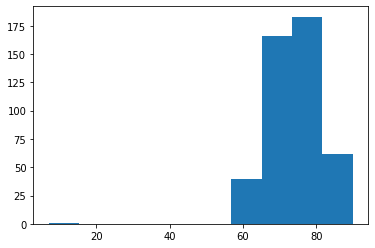

In [53]:
plt.hist(dataset["HeartRate"])

(array([234.,   0.,   0.,   0.,   0., 106.,   0.,   0.,   0., 112.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

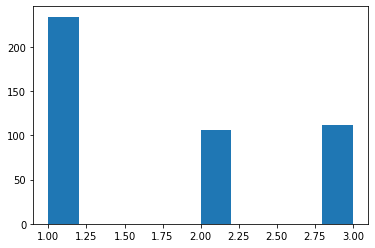

In [54]:
plt.hist(dataset["RiskLevel"])

Systolic BP and HeartRate have a normal distribution while the rest present not normal distribution